In [4]:
# Gym stuff
import gymnasium as gym
import gym_anytrading
import environment as envi

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

df = pd.read_csv('data_sp.csv')

df = df.iloc[:50]

FileNotFoundError: [Errno 2] No such file or directory: 'data_sp.csv'

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,225.039993,225.830002,223.880005,225.240005,200.629715,91366500
1,2017-01-04,225.619995,226.750000,225.610001,226.580002,201.823288,78744400
2,2017-01-05,226.270004,226.580002,225.479996,226.399994,201.662872,78379000
3,2017-01-06,226.529999,227.750000,225.899994,227.210007,202.384460,71559900
4,2017-01-09,226.910004,227.070007,226.419998,226.460007,201.716385,46939700
5,2017-01-10,226.479996,227.449997,226.009995,226.460007,201.716385,63771900
6,2017-01-11,226.360001,227.100006,225.589996,227.100006,202.286438,74650000
7,2017-01-12,226.500000,226.750000,224.960007,226.529999,201.778732,72113200
8,2017-01-13,226.729996,227.399994,226.690002,227.050003,202.241882,62717900
9,2017-01-17,226.309998,226.779999,225.800003,226.250000,201.529358,61240800


observation_space: Box(-10000000000.0, 10000000000.0, (5, 2), float32)
info {'total_reward': 20.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>} 



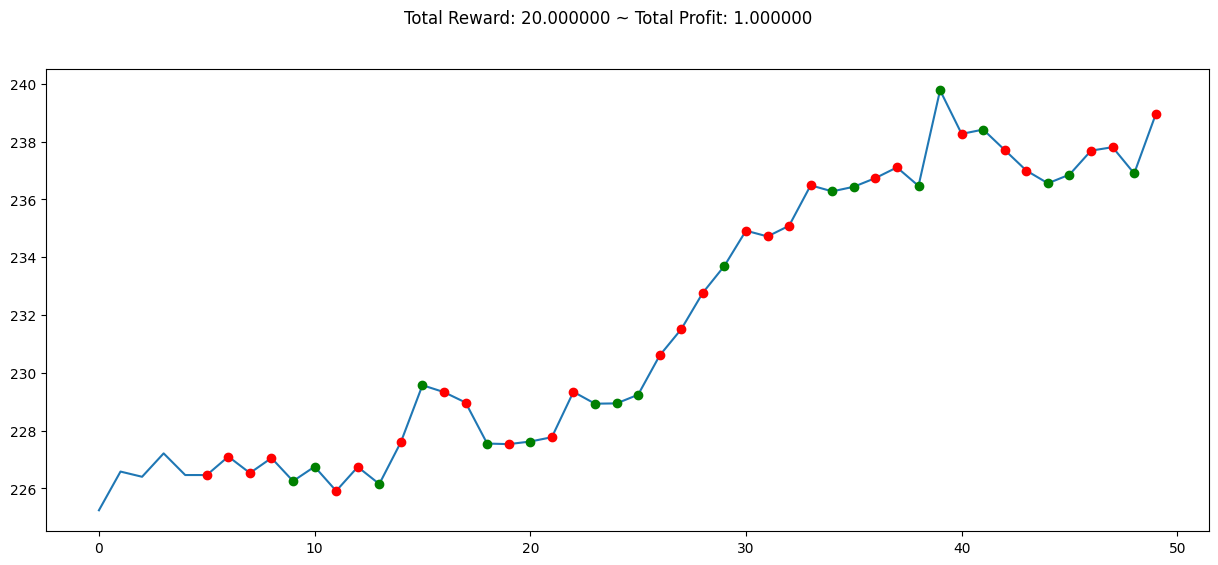

In [ ]:
# 2. Creation of the environment
env = envi.TradingEnv(df=df, window_size=5)

# env = gym.make('stocks-v0', df=df, frame_bound=(10, 110), window_size=10)
print("observation_space:", env.observation_space)

state = env.reset(seed=2808)

actions = []

while True: 
    action = env.action_space.sample()
    actions.append(action)
    n_state, reward, done, truncated, info = env.step(action)
    if done or truncated : 
        print('info', info,'\n')
        break

plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.show()

In [ ]:
actions

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0]

In [ ]:

# 4. Train Environment
model = A2C('MlpPolicy', env, verbose=0) 
model.learn(total_timesteps=50)

# 5. Test Environment

observation, info = env.reset()

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break

env.close()

In [ ]:
model.policy()

NameError: name 'model' is not defined

info: {'total_reward': 33.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}


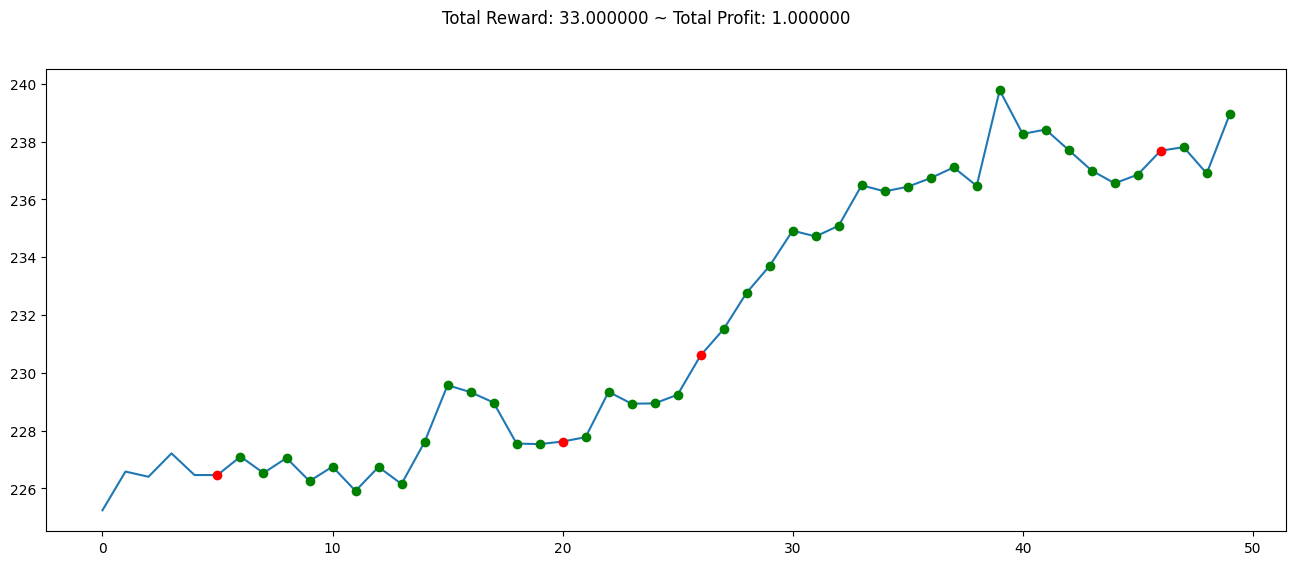

In [ ]:
print("info:", info)
plt.figure(figsize=(16, 6))
env.unwrapped.render_all()
plt.show()